# Mushroom Edibility Prediction

## Introduction
The goal of this project is to develop a machine learning model that *can predict the edibility of mushrooms based on their descriptions*. The dataset used for this project is derived from "The Audubon Society Field Guide to North American Mushrooms" and contains descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. The project will involve data preprocessing, exploratory data analysis, feature selection, model selection, model training and evaluation, hyperparameter tuning, and (possible) model deployment. The objective is to build a model that can accurately classify mushrooms as edible or poisonous based on their characteristics.

## Problem Statement
Determining the edibility of mushrooms is a complex task that requires expert knowledge. There is no simple rule or guideline that can be followed to determine whether a mushroom is edible or poisonous. This team project aims to leverage machine learning techniques to develop a predictive model that can assist in determining the edibility of mushrooms based on their descriptions. By analyzing the characteristics of mushrooms and their corresponding edibility labels, we can train a model to make accurate predictions.

## Methodology
1. Data Preprocessing: The dataset will be preprocessed to handle missing values, encode categorical variables, and normalize numerical features if necessary.
2. Exploratory Data Analysis: The dataset will be analyzed to gain insights into the distribution of features and their relationship with the target variable. Visualizations and statistical analysis will be performed to identify patterns and correlations.
3. Feature Selection: Relevant features will be selected based on their importance in predicting the edibility of mushrooms. This will help reduce dimensionality and improve model performance.
4. Model Selection: Several machine learning algorithms will be evaluated and compared to select the best model for the task. Classification algorithms such as logistic regression, decision trees, random forests, and support vector machines will be considered.
5. Model Training and Evaluation: The selected model will be trained on the preprocessed dataset and evaluated using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score. Cross-validation techniques will be employed to ensure the model's generalizability.
6. Hyperparameter Tuning: The hyperparameters of the chosen model will be tuned using techniques such as grid search or random search to optimize its performance.
7. Model Deployment: Once the model is trained and fine-tuned, it will be deployed to make predictions on new, unseen mushroom samples. The model will be integrated into a user-friendly interface where users can input mushroom descriptions and receive predictions on their edibility.

|Expected Deliverables|Timeline|
|:----------------------------------------------------------------|:----------------------------------------------|
|Exploratory data analysis report with visualizations            |Data preprocessing and EDA: 1 week|
|Trained machine learning model for mushroom edibility prediction|Feature selection and model selection: 1 week|
|Evaluation metrics and performance analysis of the model        |Model training and evaluation: 2 weeks|
|Model deployment in a user-friendly interface                   |Hyperparameter tuning/Model deployment: 1 week

![Agaricus](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExaHFiODF4Mnk0N2J2ejJldzdjeHE4aGI5ajQzNXJ1NXdob2U1YmRvdyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/MN0C8AsaO0maDJ6SR9/giphy-downsized-large.gif) ![Lepiota](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZGJ2bm9jNnB6eWd5YTI4eXdqejk5enUwNWR6N3U1OHI2bDMydnR0biZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Fyh2GnAMYtK3HTlklo/giphy.gif)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score

## Load the Poisonous Data!!!

In [3]:
#mushrooms_data = pd.read_csv('C:\\Users\\Steve\\OneDrive\\Documents\\Willamette University Classes\\sklearn\\codespaces-jupyter\\data\\mushrooms.csv')
mushrooms_data = pd.read_csv(r"C:\Users\mcken\OneDrive\Documents\Willamette\Data505\data\mushrooms.csv")
#mushrooms_data = pd.read_csv("/Users/francesromero/Documents/Grad School/505/mushrooms.csv")
mushrooms_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Dataset Description
The dataset used for this project contains the following information for each mushroom sample:
- Class: Edibility of the mushroom (edible, poisonous)
- Cap Shape: Shape of the mushroom cap (bell, conical, convex, flat, knobbed, sunken)
- Cap Surface: Surface texture of the mushroom cap (fibrous, grooves, scaly, smooth)
- Cap Color: Color of the mushroom cap (brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow)
- Bruises: Presence of bruises on the mushroom (bruises, no bruises)
- Odor: Odor of the mushroom (almond, anise, creosote, fishy, foul, musty, none, pungent, spicy)
- Gill Attachment: Attachment of gills to the stalk (attached, free)
- Gill Spacing: Spacing between gills (close, crowded, distant)
- Gill Size: Size of the gills (broad, narrow)
- Gill Color: Color of the gills (black, brown, buff, chocolate, gray, green, orange, pink, purple, red, white, yellow)
- Stalk Shape: Shape of the mushroom stalk (enlarging, tapering)
- Stalk Root: Root type of the mushroom stalk (bulbous, club, cup, equal, rhizomorphs, rooted, missing)
- Stalk Surface Above Ring: Surface texture of the stalk above the ring (fibrous, scaly, silky, smooth)
- Stalk Surface Below Ring: Surface texture of the stalk below the ring (fibrous, scaly, silky, smooth)
- Stalk Color Above Ring: Color of the stalk above the ring (brown, buff, cinnamon, gray, orange, pink, red, white, yellow)
- Stalk Color Below Ring: Color of the stalk below the ring (brown, buff, cinnamon, gray, orange, pink, red, white, yellow)
- Veil Type: Type of veil covering the gills (partial, universal)
- Veil Color: Color of the veil (brown, orange, white, yellow)
- Ring Number: Number of rings on the stalk (none, one, two)
- Ring Type: Type of ring on the stalk (cobwebby, evanescent, flaring, large, none, pendant, sheathing, zone)
- Spore Print Color: Color of the spore print (black, brown, buff, chocolate, green, orange, purple, white, yellow)
- Population: Population of mushrooms (abundant, clustered, numerous, scattered, several, solitary)
- Habitat: Habitat of mushrooms (grasses, leaves, meadows, paths, urban, waste, woods)

## Exploratory Analysis
The dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. 

Each species is identified as definitely edible, definitely poisonous.

According to dataset description, the first column represents the mushroom classification based on the two categories “edible” and “poisonous”. The other columns are:

| Feature                    | Options                                                                                          |
|----------------------------|--------------------------------------------------------------------------------------------------|
| cap-shape                  | bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s                                        |
| cap-surface                | fibrous=f, grooves=g, scaly=y, smooth=s                                                          |
| cap-color                  | brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y         |
| bruises                    | bruises=t, no=f                                                                                  |
| odor                       | almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s               |
| gill-attachment            | attached=a, descending=d, free=f, notched=n                                                      |
| gill-spacing               | close=c, crowded=w, distant=d                                                                   |
| gill-size                  | broad=b, narrow=n                                                                                |
| gill-color                 | black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y |
| stalk-shape                | enlarging=e, tapering=t                                                                          |
| stalk-surface-above-ring   | fibrous=f, scaly=y, silky=k, smooth=s                                                            |
| stalk-surface-below-ring   | fibrous=f, scaly=y, silky=k, smooth=s                                                            |
| stalk-color-above-ring     | brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y                   |
| stalk-color-below-ring     | brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y                   |
| veil-color                 | brown=n, orange=o, white=w, yellow=y                                                            |
| ring-number                | none=n, one=o, two=t                                                                             |
| ring-type                  | cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z              |
| spore-print-color          | black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y            |
| population                 | abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y                          |
| habitat                    | grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d                                |


In [4]:
mushrooms_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
mushrooms_data.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3187,p,x,f,g,f,f,f,c,b,g,...,k,b,b,p,w,o,l,h,v,d
6633,p,x,s,n,f,s,f,c,n,b,...,s,w,w,p,w,o,e,w,v,d
4879,p,f,f,g,f,f,f,c,b,p,...,k,p,n,p,w,o,l,h,v,p
3795,e,f,y,n,t,n,f,c,b,n,...,s,w,p,p,w,o,p,k,v,d
1937,e,x,f,w,f,n,f,w,b,h,...,s,w,w,p,w,o,e,n,a,g


## Does the dataset has missing value?

In [6]:
#Performing Exploratory Data Analysis
#Checking for null values
mushrooms_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# Checking the unique values in each column
for col in mushrooms_data.columns:
    print(col, mushrooms_data[col].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [8]:
mushrooms_data.apply(pd.Series.nunique).sort_values() #veil-type only has 1 unique value -- not useful 

veil-type                    1
class                        2
bruises                      2
gill-attachment              2
gill-spacing                 2
gill-size                    2
stalk-shape                  2
ring-number                  3
cap-surface                  4
veil-color                   4
stalk-surface-below-ring     4
stalk-surface-above-ring     4
ring-type                    5
stalk-root                   5
cap-shape                    6
population                   6
habitat                      7
stalk-color-above-ring       9
stalk-color-below-ring       9
odor                         9
spore-print-color            9
cap-color                   10
gill-color                  12
dtype: int64

In [9]:
mushrooms_data.groupby("class").size() / len(mushrooms_data)

class
e    0.517971
p    0.482029
dtype: float64

## Is the target data class balanced?
The target is binary, categorical, and balanced

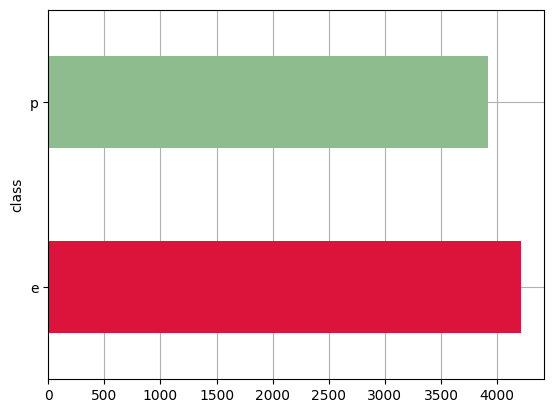

In [10]:
mushrooms_data['class'].value_counts().plot(kind='barh',color=['Crimson', 'DarkSeaGreen'],zorder =2)
plt.grid(True,zorder = 0)

In [12]:
mushrooms_data.drop('veil-type', axis=1, inplace=True)  # dropping the column as it has only one unique value
mushrooms_data.shape

(8124, 22)

## Plotting the Attributes

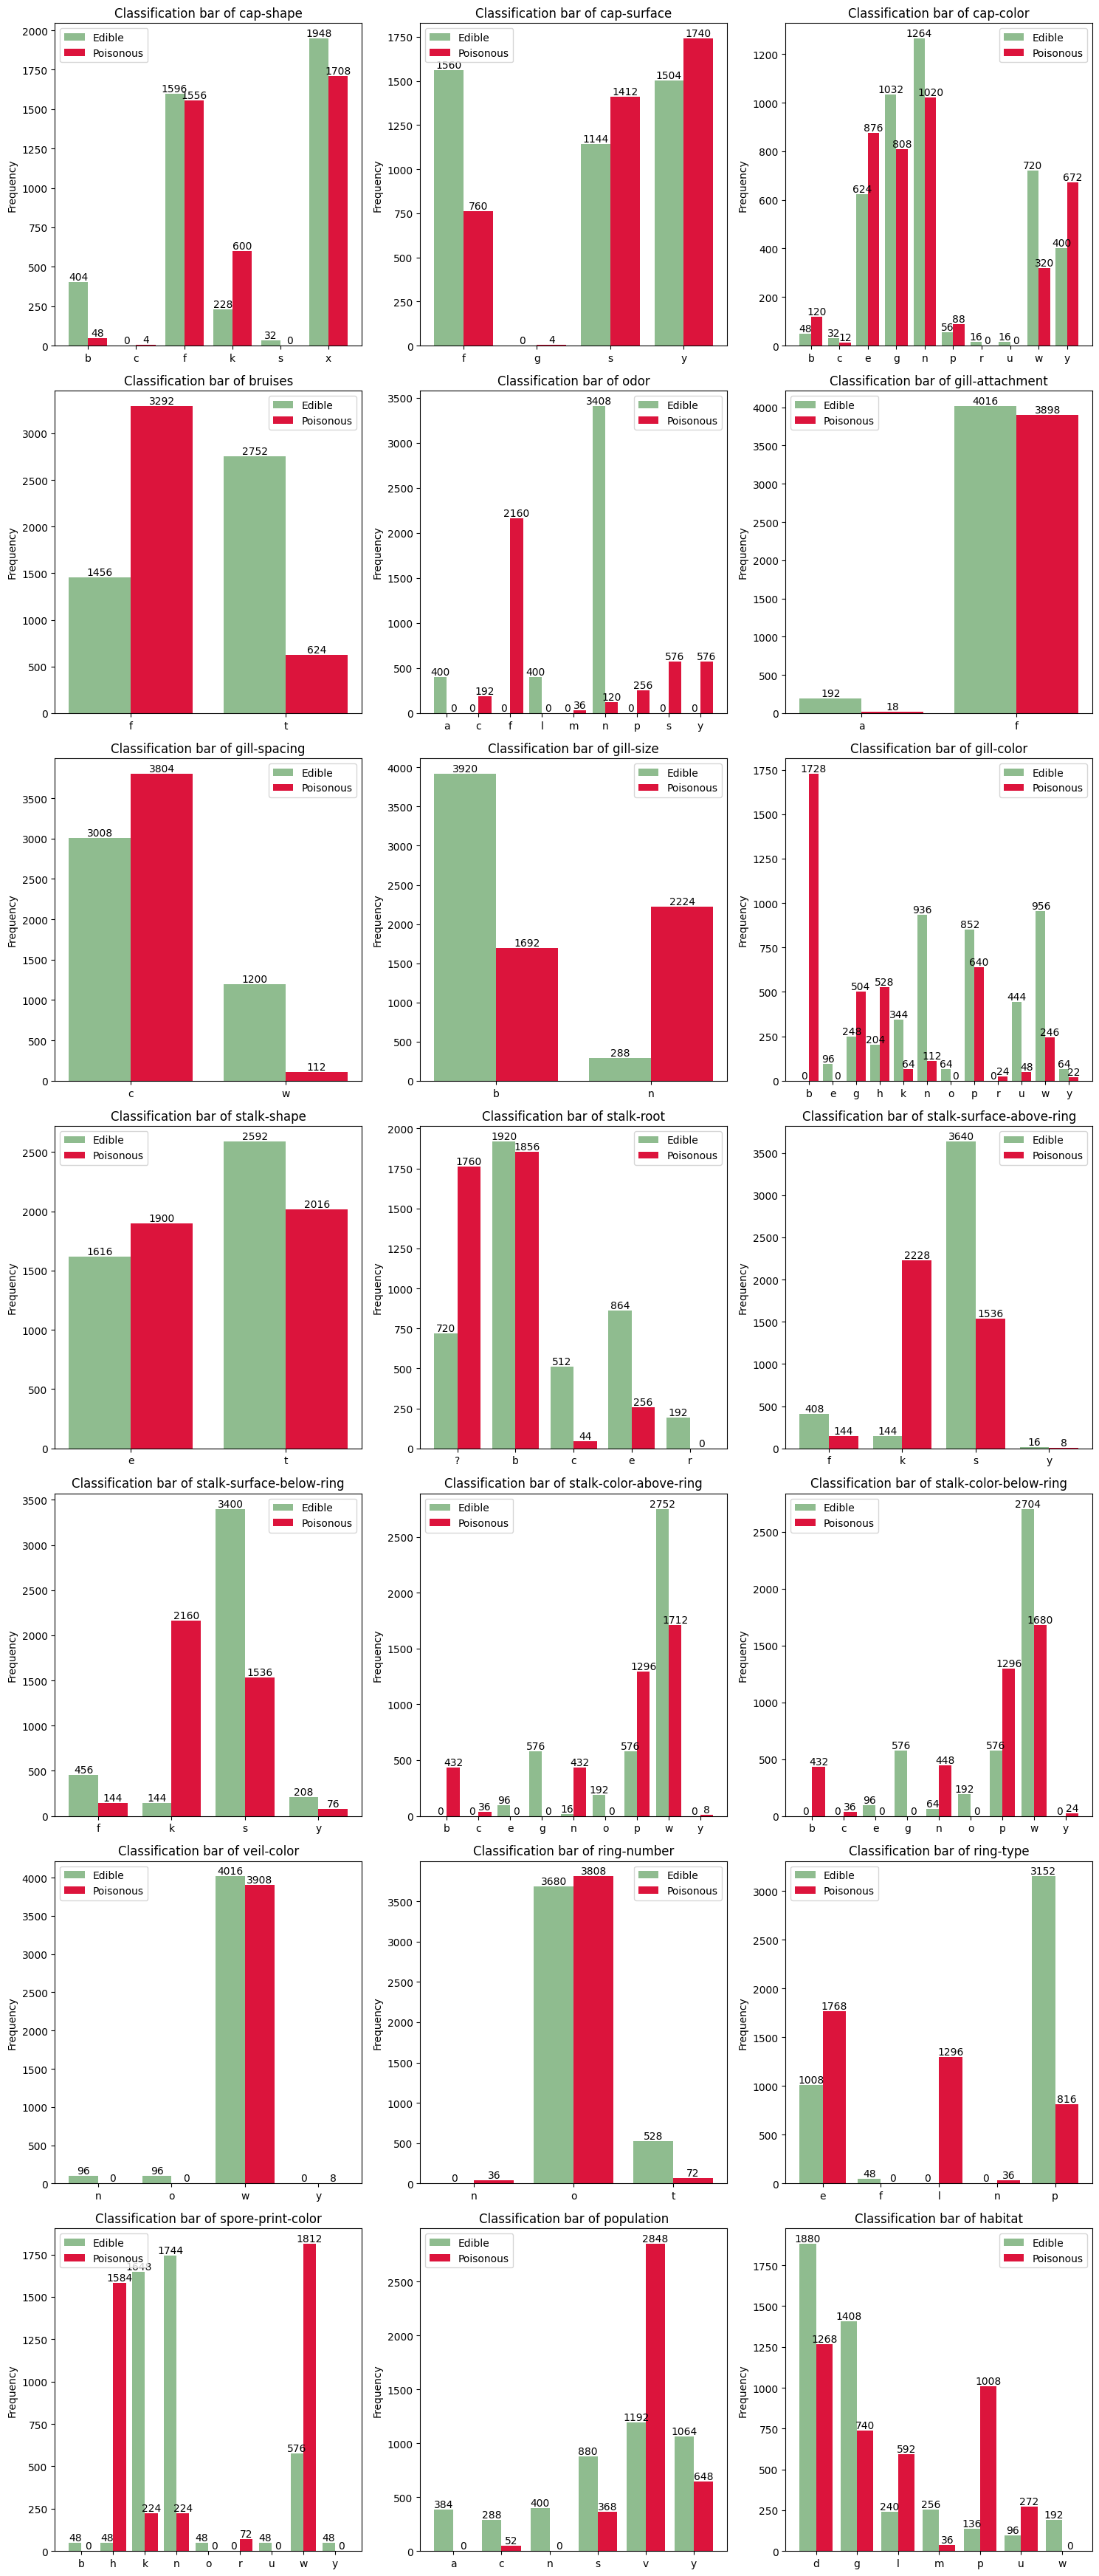

In [13]:
def plot_attribute_class_bar(attribute, ax):
    """Function to plot classification bar of given attribute"""
    plot_df = mushrooms_data[[attribute, "class"]] # Selecting the attribute and class columns
    plot_df = plot_df.groupby([attribute, "class"]).size().unstack(fill_value=0) # Grouping the data by attribute and class and reshaping the data
    labels = plot_df.index # Getting the labels for x-axis from index of the dataframe
    edible_freq = plot_df.e # Getting the frequency of edible mushrooms from the dataframe 
    poisonous_freq = plot_df.p # Getting the frequency of poisonous mushrooms from the dataframe
    
    x = np.arange(len(labels))  # the label locations 
    width = 0.4  # the width of the bars
    
    rects1 = ax.bar(x - width/2, edible_freq, width, label="Edible", color="DarkSeaGreen") # Plotting the edible frequency
    rects2 = ax.bar(x + width/2, poisonous_freq, width, label="Poisonous", color="Crimson") # Plotting the poisonous frequency
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel("Frequency")
    ax.set_title("Classification bar of %s"%(attribute))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate("{}".format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 0),
                        textcoords="offset points",
                        ha="center", va="bottom")
    
    
    autolabel(rects1)
    autolabel(rects2)

# Determine the number of rows and columns for your subplot grid
num_vars = len(mushrooms_data.columns[1:])
num_rows = int(np.ceil(num_vars / 3))  # Adjust as needed

fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))  # Adjust size as needed
axs = axs.ravel()  # Flatten to 1D

for i, column in enumerate(mushrooms_data.columns[1:]):
    plot_attribute_class_bar(column, ax=axs[i])

# Remove unused subplots
for j in range(i+1, num_rows*3):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

`The plot for odor shows that there are poisonous mushrooms with odors that are not shared with edible mushrooms. This was part of the reason our model was so perfect at predicting poisonous mushrooms.`

## Attributes / Features

In [14]:
mushrooms_data_attributes = mushrooms_data.drop("class", axis = 1)
mushrooms_data_attributes.shape
mushrooms_data_attributes.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,s,w,w,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,s,w,w,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,s,w,w,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,s,w,w,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,s,w,w,w,o,e,n,a,g


## Transform dummies variables for the attributes

In [15]:
mushrooms_data_attributes = pd.get_dummies(mushrooms_data_attributes,drop_first=True)
mushrooms_data_attributes = mushrooms_data_attributes.astype(int)
mushrooms_data_attributes.shape

(8124, 95)

In [16]:
mushrooms_data_attributes.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Label target variable

In [17]:
mushrooms_data_label = mushrooms_data["class"] #poisonous or edible
mushrooms_data_label.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [18]:
mushrooms_data_label.shape

(8124,)

# Transform dummies variables for target variable

In [19]:
mushrooms_data_label = pd.get_dummies(mushrooms_data_label, drop_first=True)
mushrooms_data_label = mushrooms_data_label.astype(int)

In [20]:
mushrooms_data_label.head() #1 is poisonous, 0 is edible 

,p
0,1
1,0
2,0
3,1
4,0


## K-Means Feature Exploration

In [24]:
#import kmean from sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Instantiate a KMeans model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the attributes
kmeans.fit(mushrooms_data_attributes, mushrooms_data_attributes.values.ravel())

# calculate the prediction
pred = kmeans.predict(mushrooms_data_attributes)

# Evaluate the performance using the accuracy score
print("Accuracy for KMeans is: {:0.4f}".format(accuracy_score(mushrooms_data_label, pred)))


Accuracy for KMeans is: 0.8954


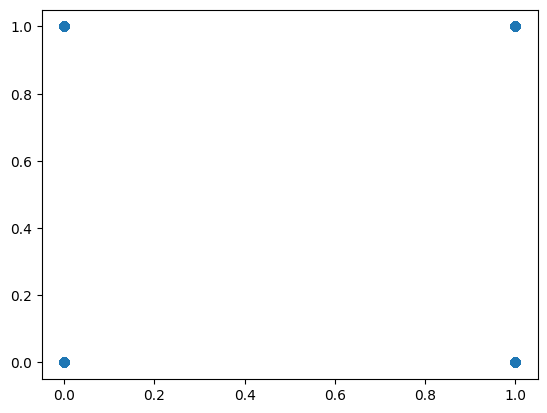

In [26]:
#attempting to graph k-means
plt.scatter(mushrooms_data_attributes.loc[:, 'bruises_t'], mushrooms_data_attributes.loc[:, 'cap-surface_s'])

#This is very interesting, obviously this is not going to work for the categorical and binary structure of our data set.

# PCA : Principal Component Analysis

The mushroom data has 95 columns. To better understand the relationships between these points, we'll use PCA to project them into just two dimensions.

In [ ]:
# PCA for cap data
from sklearn.decomposition import PCA
model_pca = PCA(n_components=2) # import PCA
model_pca.fit(mushrooms_data_attributes) # fit the model
X_pca = model_pca.transform(mushrooms_data_attributes) # transform the data
X_pca.shape


(8124, 2)

## Plotting the first two principal components of each point to learn about the independent variables

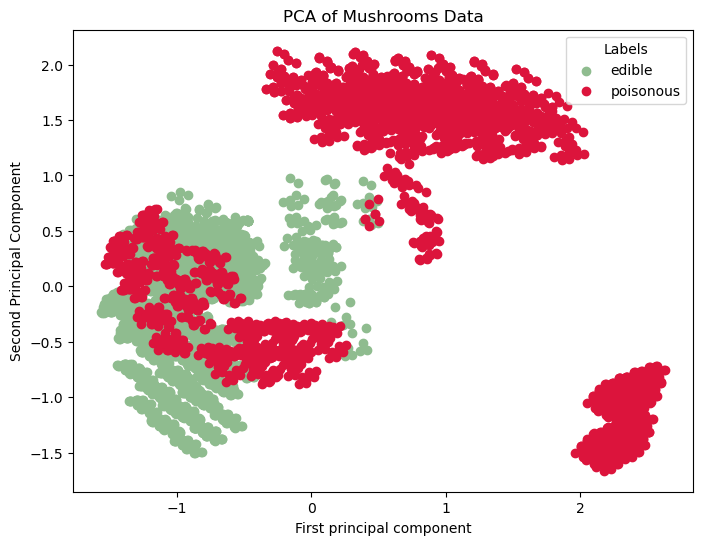

In [ ]:
plt.figure( figsize=(8, 6))

# Get unique labels and their corresponding colors
unique_labels = np.unique(mushrooms_data_label.values.ravel())
colors = ['DarkSeaGreen' if label == 0 else 'Crimson' for label in unique_labels]

for label, color in zip(unique_labels, colors):
    indices = np.where(mushrooms_data_label.values.ravel() == label)
    # Map label 1 to 'poisonous' and label 0 to 'edible'
    label_name = 'poisonous' if label == 1 else 'edible'
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], color=color, label=label_name)

plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('PCA of Mushrooms Data')
plt.legend(title='Labels')
plt.show()

## Choosing the Number of Components

An important aspect of using PCA is figuring out how many components are necessary to describe the data. We can do this by examining the cumulative explained variance ratio plotted against the number of components, as shown in the figure

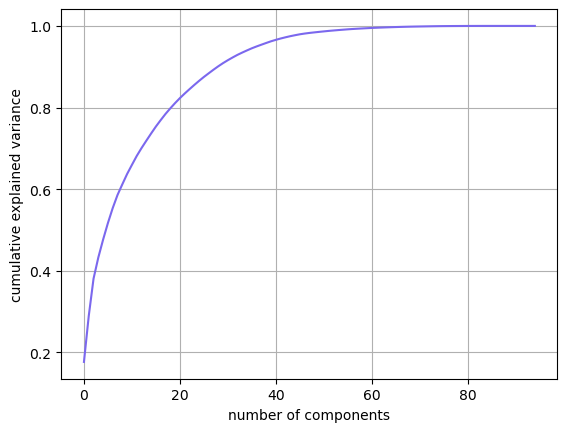

In [ ]:
pca = PCA().fit(mushrooms_data_attributes)
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='MediumSlateBlue')
plt.grid(True)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');


This curve shows the percentage of the total variance (originally in 95 dimensions) captured by the first $N$ components. For instance, in the mushroom data, about 80% of the variance is explained by the first 20 components. To cover nearly 100% of the variance, approximately 60 components are needed.

# Mushroom edibility using different models with all available data

## GaussianNB

In [ ]:
# import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(mushrooms_data_attributes, mushrooms_data_label, test_size=0.3, random_state=42)

# Instantiate a Naive Bayes classifier
clf_nb = GaussianNB()

# Fit the model to the training set
clf_nb.fit(X_train, y_train.values.ravel())

# Calculate the predictions on the test set
pred = clf_nb.predict(X_test)

# Evaluate the performance using the accuracy score
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, pred)))

Accuracy: 0.9487


Our Naive Bayes model is predicting very well when we use all of our data...

## KNNeighborsClassifier

In [ ]:
# K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
# Instantiate a 5-nearest neighbors classifier with 'ball_tree' algorithm
clf_knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree') # ball_tree algorithm is used for high dimensional data

# Fit the model to the training set
clf_knn.fit(X_train, y_train.values.ravel()) # ravel() is used to convert the 2D array to 1D array

# Calculate the predictions on the test set
pred = clf_knn.predict(X_test)

# Evaluate the performance using the accuracy score
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, pred)))

Accuracy: 1.0000


Our KNN model is perfect...

## DecisionTreeClassifier

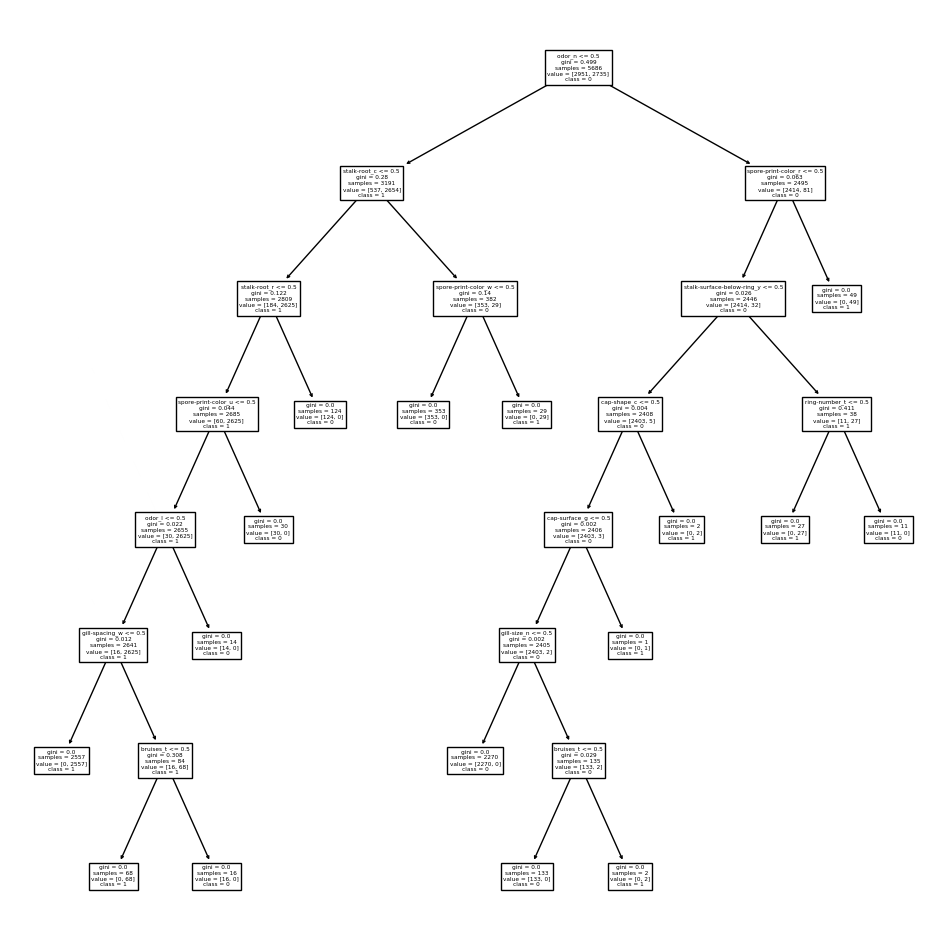

In [ ]:
# plot the decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Instantiate a decision tree classifier
clf_tree = DecisionTreeClassifier()

# Fit the model to the training set
clf_tree.fit(X_train, y_train.values.ravel())

# Plot the decision tree
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust size as needed
tree.plot_tree(clf_tree, ax=ax, feature_names=X_train.columns.tolist(), class_names=[str(class_) for class_ in clf_tree.classes_])
plt.show()

# Ensemble Learning (stacking method)

In [ ]:
# import StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


# Create the first-layer models
clf_knn = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
clf_dt = DecisionTreeClassifier(min_samples_leaf=5,min_samples_split=15, random_state=500)
clf_nb = GaussianNB()

# Create the second-layer model (meta-model)
clf_lr = LogisticRegression()

# Create and fit a stacking classifier, using the parameters classifiers - a list containing the first-layer classifiers - and meta_classifier - the default logistic regression.
clf_stack = StackingClassifier(estimators=[('knn', clf_knn), ('dt', clf_dt), ('nb', clf_nb)], final_estimator=clf_lr)
clf_stack.fit(X_train, y_train.values.ravel())

# Evaluate the stacked model’s performance
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, clf_stack.predict(X_test))))

Accuracy: 1.0000


We tried an ensemble which was unnecessary since a single model performed quite well. But with the ensemble we see 100% accuracy...

### The issue with odor...
Becuase our un-optimized models were performing so well, we decided to look back and figure our what was going on. We looked at the odor data, and realized that many of the odors associated with poisonous mushrooms were not represented in the edible data. Odor alone was a huge predictor:

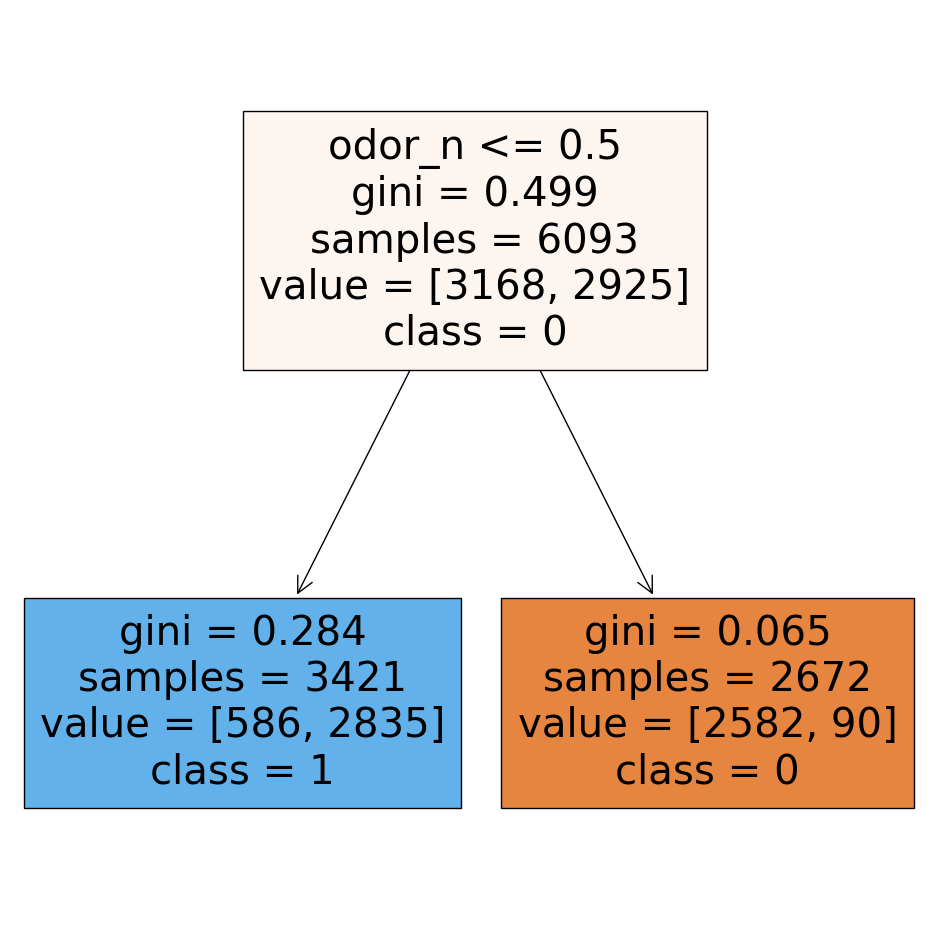

In [ ]:
# Create and train the Decision Tree model to demonstrate effect of odor 

X_train, X_test, y_train, y_test = train_test_split(mushrooms_data_attributes, mushrooms_data_label, random_state=42)
model = tree.DecisionTreeClassifier(max_depth=1)
model.fit(X_train, y_train)

class_names = [str(cls) for cls in model.classes_]

plt.figure(figsize=(12, 12))
tree.plot_tree(model, feature_names=list(X_train.columns), class_names=class_names, filled=True)
plt.show()


In [ ]:
# Calculate the predictions on the test set
pred = model.predict(X_test)

# Evaluate the performance using the accuracy score
print("Accuracy: {:0.4f}".format(accuracy_score(y_test, pred)))

Accuracy: 0.8799


Just odor alone has such a high accuracy! After trying a couple different approaches, we decided that it would be most interesting to break the dataset up into mushroom anatomy and try to optimize a model with limited information. 

# Part 2: Partitioning the Data

## Splitting by attributes type

<img src="image\AngryMushroom2.jpeg" width=800/>

In [ ]:
# Split the mushrooms_data into different datasets based on attributes
cap_data = mushrooms_data[['cap-shape', 'cap-surface', 'cap-color', 'bruises']]
gill_data = mushrooms_data[['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']]
stalk_data = mushrooms_data[['stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring']]
veil_data = mushrooms_data[['veil-color']]
ring_data = mushrooms_data[['ring-number', 'ring-type']]

# Print the first few rows of each dataset
print("Cap Data:")
print(cap_data.head())
print("\nGill Data:")
print(gill_data.head())
print("\nStalk Data:")
print(stalk_data.head())
print("\nVeil Data:")
print(veil_data.head())
print("\nRing Data:")
print(ring_data.head())

Cap Data:
  cap-shape cap-surface cap-color bruises
0         x           s         n       t
1         x           s         y       t
2         b           s         w       t
3         x           y         w       t
4         x           s         g       f

Gill Data:
  gill-attachment gill-spacing gill-size gill-color
0               f            c         n          k
1               f            c         b          k
2               f            c         b          n
3               f            c         n          n
4               f            w         b          k

Stalk Data:
  stalk-shape stalk-root stalk-surface-above-ring stalk-surface-below-ring  \
0           e          e                        s                        s   
1           e          c                        s                        s   
2           e          c                        s                        s   
3           e          e                        s                        s   
4          

In [ ]:
#recreating y
mushrooms_data_label = mushrooms_data["class"]
mushrooms_data_label.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [ ]:
#recreating y with get dummies
mushrooms_data_label = pd.get_dummies(mushrooms_data_label, drop_first=True) # Convert the class column to binary values
mushrooms_data_label = mushrooms_data_label.astype(int) # Convert the data type to integer

In [ ]:
mushrooms_data_label.head()

,p
0,1
1,0
2,0
3,1
4,0


In [ ]:
#created X for just the mushroom cap datax
cap_data_attributes = pd.get_dummies(cap_data, drop_first=True) # Convert the categorical data to binary values
cap_data_attributes = cap_data_attributes.astype(int) # Convert the data type to integer
cap_data_attributes.head() # Display the first few rows of the attribute dataset


,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Split the cap data attributes into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cap_data_attributes, mushrooms_data_label, test_size=0.3, random_state=42)

## Optimizing 3 different models: KNN, LR and Decision Tree

## KNeighborsClassifier using cap variables

In [ ]:
# K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
# Instantiate a 5-nearest neighbors classifier with 'ball_tree' algorithm
clf_knn_cap = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree') # ball_tree algorithm is used for high dimensional data

# Fit the model to the training set
clf_knn_cap.fit(X_train, y_train.values.ravel()) # ravel() is used to convert the 2D array to 1D array

# Calculate the predictions on the test set
pred = clf_knn_cap.predict(X_test)

# Evaluate the performance using the accuracy score
print("Accuracy for the KNN is: {:0.4f}".format(accuracy_score(y_test, pred)))

Accuracy for the KNN is: 0.8872


## LogisticRegression using cap variables

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression        

# Instantiate a logistic regression model
clf_lr_cap = LogisticRegression(max_iter=1000) # Increase the number of iterations to avoid convergence warning

# Fit the model to the training set
clf_lr_cap.fit(X_train, y_train.values.ravel())

# Calculate the predictions on the test set
pred = clf_lr_cap.predict(X_test)

# Evaluate the performance using the accuracy score
print("Accuracy for the Linear Regression is: {:0.4f}".format(accuracy_score(y_test, pred)))


Accuracy for the Linear Regression is: 0.8072


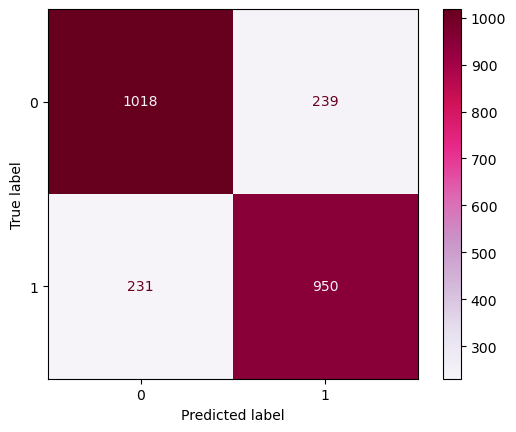

In [ ]:
#confusion matrix
y_pred = clf_lr_cap.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=clf_lr_cap.classes_).plot(cmap = "PuRd")

In [ ]:
#evaluating the coefficients of the logistic regression model
coefficients_lr = pd.Series(clf_lr_cap.coef_[0], clf_lr_cap.feature_names_in_)
coefficients_lr.sort_values(ascending=False)

cap-shape_f      1.767440
cap-shape_c      1.724542
cap-shape_k      1.706074
cap-surface_g    1.629532
cap-shape_x      1.611123
cap-surface_y    1.539377
cap-surface_s    1.214271
cap-color_p     -0.544383
cap-color_y     -0.734722
cap-shape_s     -1.085811
cap-color_e     -1.345185
cap-color_g     -1.813446
cap-color_w     -2.124554
cap-color_n     -2.223124
bruises_t       -2.836705
cap-color_c     -3.099659
cap-color_r     -3.922047
cap-color_u     -4.188295
dtype: float64

In [ ]:
interpret_clf_lr_cap = pd.DataFrame(coefficients_lr, columns = ['coefficient'])
interpret_clf_lr_cap['log odds'] = np.exp(interpret_clf_lr_cap['coefficient'])

In [ ]:
#evaluating the log odds of the logistic regression model
interpret_clf_lr_cap.sort_values('log odds', ascending=False)

,coefficient,log odds
cap-shape_f,1.767440,5.855841
cap-shape_c,1.724542,5.609950
cap-shape_k,1.706074,5.507300
cap-surface_g,1.629532,5.101485
cap-shape_x,1.611123,5.008434
cap-surface_y,1.539377,4.661687
cap-surface_s,1.214271,3.367838
cap-color_p,-0.544383,0.580200
cap-color_y,-0.734722,0.479639
cap-shape_s,-1.085811,0.337628


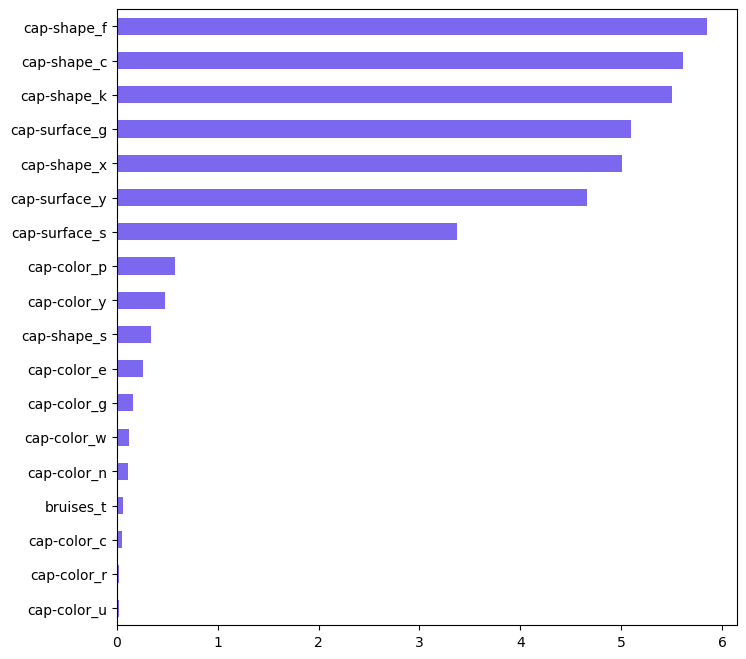

In [ ]:
##for the linear regression model, we can see that cap shape performs well in telling us how likely it is that the mushroom is poisonous

plt.figure(figsize = (8,8))
interpret_clf_lr_cap['log odds'].sort_values().plot(kind = 'barh', color='MediumSlateBlue')
plt.show();

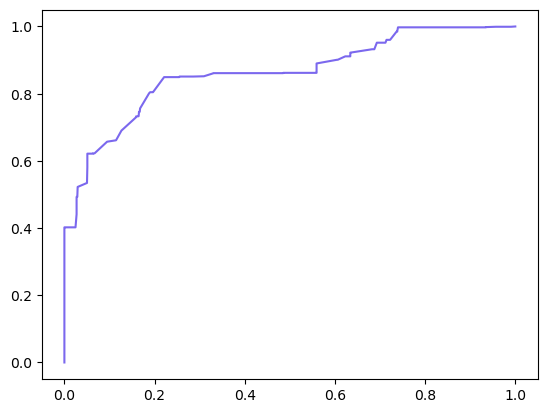

In [ ]:
y_pred_lr_proba = clf_lr_cap.predict_proba(X_test)
fpr,tpr,thresholds = roc_curve(y_true=y_test, y_score=y_pred_lr_proba[:,1])
plt.plot(fpr, tpr, color='MediumSlateBlue')

In [ ]:
print(roc_auc_score(y_true=y_test, y_score=y_pred_lr_proba[:,1]))


0.8618203765938686


## Decision Tree Time!

While we really liked the logistic regressions performance with the cap data, it did not fit our practical expectations for a map that could be used functionally while hunting for mushrooms.  It would require the user to have to work with numerical values on categorical data, which seems like a real downer while you are on a mushroom hunt!

In [ ]:
# Decision Tree - optimized with random grid search 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


param_grid = {
    'max_depth': range(1, 20), 
    'min_samples_split': range(2, 11),  
    'min_samples_leaf': range(1, 11)  
}


class_dt = DecisionTreeClassifier()


random_search = RandomizedSearchCV(
    class_dt, param_distributions=param_grid, n_iter=100, scoring='accuracy', cv=3, verbose=1, n_jobs=-1
)

# Fit to training data
random_search.fit(X_train, y_train.values.ravel())

# Get the best model from the search
best_dt = random_search.best_estimator_

pred_dt = best_dt.predict(X_test)

#accuracy score
print("Decision Tree Accuracy: {:0.4f}".format(accuracy_score(y_test, pred_dt)))

# Print the best 
print("Best Hyperparameters:", random_search.best_params_)
#slightly different each time we run it

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Decision Tree Accuracy: 0.8864
Best Hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 13}


In [ ]:
#THE BEST DECISION TREE BASED ON RANDOM GRID SEARCH
class_dt = DecisionTreeClassifier(min_samples_split = 5, min_samples_leaf = 1, max_depth = 13)
# Fit the model to the training set
class_dt.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(max_depth=13, min_samples_split=5)

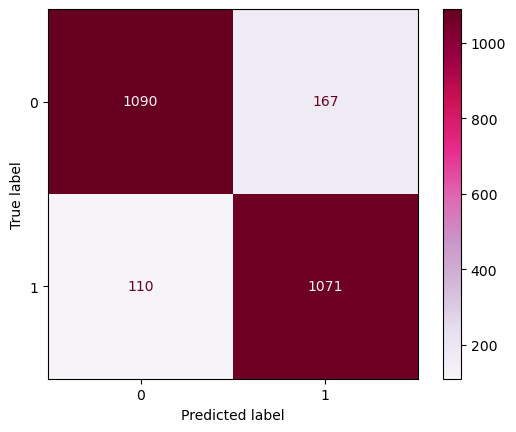

In [ ]:
#confusion matrix
y_pred = class_dt.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=class_dt.classes_).plot(cmap = 'PuRd')

In [ ]:
##in contrast to the linear regression, bruises are one of the strongers performing features for predicting edibility within the decision tree model.

tree_feature_importances = pd.Series(class_dt.feature_importances_, class_dt.feature_names_in_)
tree_feature_importances.sort_values(ascending=False)

bruises_t        0.358155
cap-color_w      0.138728
cap-surface_s    0.136080
cap-color_y      0.080929
cap-surface_y    0.079633
cap-color_e      0.052142
cap-shape_f      0.031802
cap-shape_x      0.029686
cap-color_p      0.019556
cap-color_n      0.018010
cap-color_u      0.012620
cap-shape_k      0.011468
cap-color_r      0.010135
cap-color_g      0.008115
cap-color_c      0.006448
cap-shape_s      0.004794
cap-surface_g    0.001119
cap-shape_c      0.000583
dtype: float64

In [ ]:
#checking decision tree model performance with cross validation, does very well
dt_scores = cross_val_score(class_dt, X_train, y_train, cv=5)
dt_scores

array([0.91388401, 0.89709763, 0.89006157, 0.88478452, 0.8944591 ])

In [ ]:
##lets run a loop to evaluate the cross validation performance at multiple depth levels
for max_depth in range(3, 30):
    class_dt_cv_opt = tree.DecisionTreeClassifier(max_depth = max_depth)
    scores = cross_val_score(class_dt_cv_opt, X_train, y_train, cv=5)
    print(max_depth, scores.mean(),'\t', scores.std())

3 0.810935724851728 	 0.010796721610187634
4 0.81884850986084 	 0.014036637263434966
5 0.8380197634140346 	 0.012932868242892434
6 0.845407007927933 	 0.011519588195330362
7 0.8494516603215381 	 0.01112620213766011
8 0.8582454985138023 	 0.009100982735255394
9 0.8661598292302533 	 0.009753354071450754
10 0.8879674412206142 	 0.008959668791426402
11 0.8893746531819158 	 0.009905189250218677
12 0.8962332657859227 	 0.009741914668868711
13 0.8964091672810852 	 0.009716198379601186
14 0.8960573642907599 	 0.009843295993075535
15 0.8960573642907599 	 0.009843295993075535
16 0.8964091672810852 	 0.009716198379601186
17 0.8962332657859224 	 0.009820996294447076
18 0.8964091672810852 	 0.009716198379601186
19 0.8962332657859227 	 0.009741914668868711
20 0.8962332657859227 	 0.009741914668868711
21 0.8964091672810852 	 0.009716198379601186
22 0.8964091672810852 	 0.009716198379601186
23 0.8962332657859227 	 0.009741914668868711
24 0.8962332657859227 	 0.009741914668868711
25 0.8962332657859227 

<Axes: >

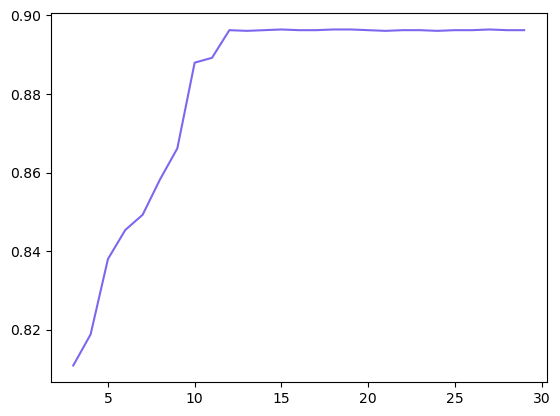

In [ ]:
##looks like we can optimize around a max depth of 10,11,12
perf_data = pd.Series([], name='accuracy')

for max_depth in range(3, 30):
    class_dt_cv_opt = tree.DecisionTreeClassifier(max_depth = max_depth)
    scores = cross_val_score(class_dt_cv_opt, X_train, y_train, cv=5)
    perf_data[max_depth] = scores.mean();
     
perf_data.plot(color='MediumSlateBlue')

In [ ]:
#Final Decision Tree -- commented out becuse illegible 
class_dt = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=1, max_depth=13)
class_dt.fit(X_train, y_train.values.ravel())

# Plot the decision tree
#fig, ax = plt.subplots(figsize=(12, 12))  # Adjust size as needed
#tree.plot_tree(class_dt, ax=ax, feature_names=X_train.columns.tolist(), class_names=[str(class_) for class_ in class_dt.classes_])
#plt.show()


DecisionTreeClassifier(max_depth=13, min_samples_split=5)

# Conclusion:
The original objective was to build a model that could accurately classify mushrooms as edible or poisonous based on their characteristics. We realized early on that we could get a very high accuracy with simple models due to the nature of our data. We decided to make the project more challenging by breaking up our dataset and only using characteristics that pertained to the mushroom cap. 

<h3><center> With all of our data: </center></h3>

|Model|Accuracy|
|:-----------------------------------|:----------------------------------------------|
|Naive Bayes                         |0.9487|
|K-Nearest Neighbors                 |1|
|Ensemble                            |1|
|Decision Tree (using just odor data)|0.8799|

<h3><center>When using the cap data:</center></h3>

|Model|Accuracy|
|:-------------------|:-----|
|K-Nearest Neighbors |0.8872|
|Linear Regression   |0.8072|
|Decision Tree       |0.8856|

Using just the cap data, the KNN model is the most accurate. But the Decision Tree was not far off and we preferred the decision tree model for its easy use. We liked that we could see where the splits where happening because it was similar to how you would want to identify mushrooms in the wild. One could go through the steps of the tree while holding up a mushroom cap, and use the tree to predict the edibility of that mushroom. That said, we would not recommend this, even with the accuracy score of 0.89...